In [23]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
G = nx.Graph()
coord = {}
with open("graph.txt", "r") as file:
    
    n_samples, k_neigh = file.readline().split()
    n_samples = int(n_samples)
    k_neigh = int(k_neigh)
    print(n_samples, k_neigh)
    
    for i in range(n_samples):
        node, x, y = file.readline().split()
        node = int(node)
        x = float(x)
        y = float(y)
        
        G.add_node(node)
        coord[node] = (x, y)
    
    for i in range(n_samples):
        node, neigh = file.readline().split(' ', 1)
        node = int(node)
        for adj in neigh.split():
            G.add_edge(node, float(adj))


500 140


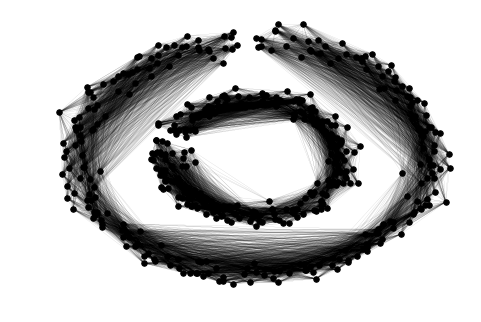

In [125]:
options = {
    'node_color': 'black',
    'node_size': 30,
    'width': 0.05
}

nx.draw(G, pos=coord, **options)

2


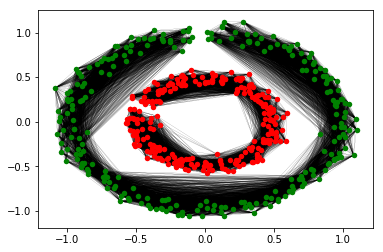

In [126]:
print(nx.number_connected_components(G))
subgraphs = list(nx.connected_component_subgraphs(G))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, subgraph in enumerate(subgraphs):
    nx.draw_networkx(subgraph, pos=coord, node_color = colors[i], node_size=30, linewidths=0, width=0.1, with_labels=False)

2


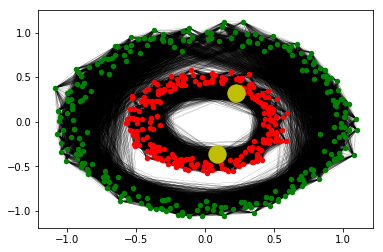

In [78]:
rank = nx.pagerank(G)

print(nx.number_connected_components(G))
subgraphs = list(nx.connected_component_subgraphs(G))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, subgraph in enumerate(subgraphs):
    nx.draw_networkx(subgraph, pos=coord, node_color = colors[i], node_size=30, linewidths=0, width=0.1, with_labels=False)
    m = max(rank, key=rank.get)
    rank.pop(m)
    nx.draw_networkx_nodes(G, coord, nodelist = [m], node_color = 'y')